In [260]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #easy plotting: subpackage of seaborn

import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [261]:
#Import Data
Sarah_raw_data = pd.read_csv("Sarah_diamond_dataset_tutorials.csv")
Sarah_raw_data.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Price_High
0,1,1.10,Ideal,H,SI1,NaN,EX,GIA,5169,0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183,0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370,0
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171,0


## Viewing the dataset

1. View overall dataset stats
2. Check values in each categorical column (+ if there are any nulls)
3. Plot to check values in numerical columns
4. Check for any duplicate rows (drop them)

In [262]:
#View overall stats
print(Sarah_raw_data.info())
Sarah_raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6002 non-null   int64  
 1   Carat Weight  5829 non-null   float64
 2   Cut           6002 non-null   object 
 3   Color         6002 non-null   object 
 4   Clarity       6002 non-null   object 
 5   Polish        2954 non-null   object 
 6   Symmetry      6002 non-null   object 
 7   Report        6002 non-null   object 
 8   Price         6002 non-null   int64  
 9   Price_High    6002 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 469.0+ KB
None


,ID,Carat Weight,Price,Price_High
count,6002.000000,5829.000000,6002.000000,6002.000000
mean,2999.506331,1.334982,11791.554648,0.316894
std,1732.761564,0.476824,10183.710299,0.465305
min,1.000000,0.750000,2184.000000,0.000000
25%,1499.250000,1.000000,5149.500000,0.000000
50%,2999.500000,1.130000,7857.000000,0.000000
75%,4499.750000,1.590000,15047.500000,1.000000
max,6000.000000,2.910000,101561.000000,1.000000


In [263]:
#Check values in each categorical column
print(Sarah_raw_data['Cut'].unique())
print(Sarah_raw_data['Color'].unique())
print(Sarah_raw_data['Clarity'].unique())
print(Sarah_raw_data['Polish'].unique())
print(Sarah_raw_data['Symmetry'].unique())
print(Sarah_raw_data['Report'].unique())

['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
['H' 'E' 'G' 'D' 'F' 'I']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
[nan 'ID' 'EX' 'VG' 'G']
['EX' 'ID' 'VG' 'G']
['GIA' 'AGSL']


C:\Users\gulat\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gulat\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1200., 1905.,  684.,  622.,  150.,  610.,  437.,  128.,   76.,
          17.]),
 array([0.75 , 0.966, 1.182, 1.398, 1.614, 1.83 , 2.046, 2.262, 2.478,
        2.694, 2.91 ]),
 <a list of 10 Patch objects>)

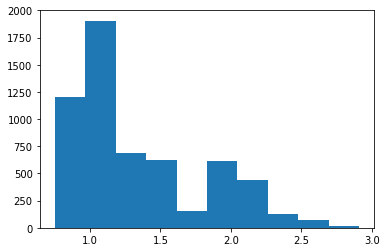

In [264]:
#Plot to check values in numerical columns (run these individually in different cells)
plt.hist(Sarah_raw_data['Carat Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16e61198fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x16e6119cc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e61198948>],
 'medians': [<matplotlib.lines.Line2D at 0x16e6119ce08>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e611a2cc8>],
 'means': []}

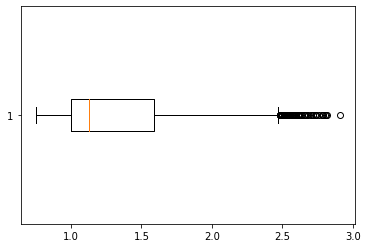

In [265]:
plt.boxplot(Sarah_raw_data[~Sarah_raw_data['Carat Weight'].isna()]['Carat Weight'],vert=False) #Some modifications to address null values

{'whiskers': [<matplotlib.lines.Line2D at 0x16e5f885b08>,
 'caps': [<matplotlib.lines.Line2D at 0x16e5f8847c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e5f8e3808>],
 'medians': [<matplotlib.lines.Line2D at 0x16e5f87ef48>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e5f8da848>],
 'means': []}

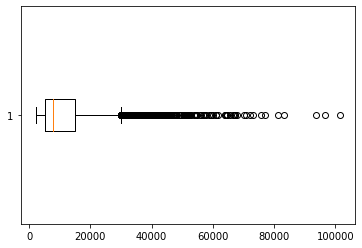

In [266]:
plt.boxplot(Sarah_raw_data['Price'],vert=False)

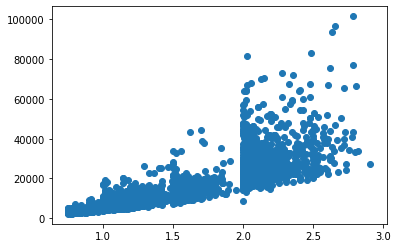

In [267]:
plt.scatter(Sarah_raw_data['Carat Weight'],Sarah_raw_data['Price'])

In [268]:
#Check for any duplicate rows and drop them
Sarah_raw_data[Sarah_raw_data.duplicated()]
Sarah_raw_data = Sarah_raw_data.drop_duplicates() #Drop duplicate rows
Sarah_raw_data.shape

(6000, 10)

# Supervised Learning - Linear Regression

## Step 1: Create labels and features, create training and test datasets

In [269]:
#Create labels and features
y=Sarah_raw_data["Price"]
X=Sarah_raw_data.drop(columns=["Price", "Price_High"])

In [270]:
#Create a 75:25 train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=1/4)

## Step 2: Data Pre-processing

1. Drop irrelevant columns
2. Handle null values - either drop or impute
3. Scale/normalize data in relevant columns
4. Handle categorical data - create dummies
5. Complete these steps separately in the training and testing dataset

In [271]:
#Perform pre-processing on training dataset

#Drop column ID as it appears to be inconsequential to Price
X_train = X_train.drop(columns=['ID'])

#Check null values
X_train.isna().sum()

#Drop column Polish
X_train = X_train.drop(columns=['Polish'])

#Impute values for Carat Weight based on mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
X_train[['Carat Weight']]=imp.fit_transform(X_train[['Carat Weight']])

X_train.isna().sum()

#Normalize data in the Carat Weight column (in the range 0 to 1)
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_train[['Carat Weight']] = min_max_scaler.fit_transform(X_train[['Carat Weight']])

#Convert column "Cut" to take ordinal values in order - 'Fair', 'Good', 'Very Good', 'Ideal', 'Signature-Ideal'
for i in X_train.index:
    if X_train.loc[i,"Cut"]=="Fair":
        X_train.loc[i,"Cut_num"]=0
    elif X_train.loc[i,"Cut"]=="Good":
         X_train.loc[i,"Cut_num"]=1
    elif X_train.loc[i,"Cut"]=="Very Good":
         X_train.loc[i,"Cut_num"]=2
    elif X_train.loc[i,"Cut"]=="Ideal":
         X_train.loc[i,"Cut_num"]=3    
    else:
        X_train.loc[i,"Cut_num"]=4
X_train = X_train.drop(columns=['Cut'])

#Convert column "Clarity" - 'SI1' (Slightly Included) 'VS1' 'VS2' 'VVS2' 'VVS1' (Very Slightly Included) 'IF' 'FL'(Flawless)
for i in X_train.index:
    if X_train.loc[i,"Clarity"]=="SI1":
        X_train.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_train.loc[i,"Clarity"]=="IF" or X_train.loc[i,"Clarity"]=="FL":
         X_train.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_train.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_train = X_train.drop(columns=['Clarity'])

#Get dummies for categorical data
X_train=pd.get_dummies(X_train,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

###Other possible required transformations
##Taking log
#from numpy import log
#X_train["Carat Weight"]=X_train["Carat Weight"].apply(log)
##Taking square
#X_train["Carat Weight"]=X_train["Carat Weight"]**2

###Polynomial features - Multiplies each feature with the other
#from sklearn.preprocessing import PolynomialFeatures
#degree=2
#poly = PolynomialFeatures(degree)
#X_train_poly=poly.fit_transform(X_train)

In [272]:
#Repeat the same steps for the test dataset
X_test = X_test.drop(columns=['ID'])
X_test = X_test.drop(columns=['Polish'])
X_test[['Carat Weight']]=imp.fit_transform(X_test[['Carat Weight']])
X_test[['Carat Weight']] = min_max_scaler.fit_transform(X_test[['Carat Weight']])
for i in X_test.index:
    if X_test.loc[i,"Cut"]=="Fair":
        X_test.loc[i,"Cut_num"]=0
    elif X_test.loc[i,"Cut"]=="Good":
         X_test.loc[i,"Cut_num"]=1
    elif X_test.loc[i,"Cut"]=="Very Good":
         X_test.loc[i,"Cut_num"]=2
    elif X_test.loc[i,"Cut"]=="Ideal":
         X_test.loc[i,"Cut_num"]=3    
    else:
        X_test.loc[i,"Cut_num"]=4
X_test = X_test.drop(columns=['Cut'])

for i in X_test.index:
    if X_test.loc[i,"Clarity"]=="SI1":
        X_test.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_test.loc[i,"Clarity"]=="IF" or X_test.loc[i,"Clarity"]=="FL":
         X_test.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_test.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_test = X_test.drop(columns=['Clarity'])

X_test=pd.get_dummies(X_test,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

## Step 3 - Train the model on the training set

In [273]:
#Fit the model
lm = LinearRegression().fit(X_train, y_train)

#Check value of coefficients
lm.coef_

#Check value of the intercept
lm.intercept_

13020.891326912391

## Step 4 - Validate the hyperparameters, set a threshold, retrain on training + validation

In [274]:
#To be covered in the next tutorial, not required for simple Linear Regression

## Step 5 - Test on the testing dataset

In [275]:
#Calculate predicted values
y_pred = lm.predict(X_test)

In [276]:
#Calculate r-square, root mean squraed error
print(lm.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred)**(1/2))

0.810338448464331
4423.223753729366


# Supervised Learning - Logistic Regression

Note: Classify diamonds into high price or low price

## Step 1: Create labels and features, create training and test datasets

In [277]:
#Create labels and features
y=Sarah_raw_data["Price_High"]
X=Sarah_raw_data.drop(columns=["Price", "Price_High"])

In [278]:
#Create a 50:25:25 train test validation split
X_train, X_other, y_train, y_other= train_test_split(X, y, test_size=1/2)
X_val, X_test, y_val, y_test= train_test_split(X_other, y_other, test_size=1/2)

## Step 2: Data Pre-processing

Repeat steps from above

In [279]:
#Perform pre-processing on training dataset

#Drop column ID as it appears to be inconsequential to Price
X_train = X_train.drop(columns=['ID'])

#Check null values
X_train.isna().sum()

#Drop column Polish
X_train = X_train.drop(columns=['Polish'])

#Impute values for Carat Weight based on mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
X_train[['Carat Weight']]=imp.fit_transform(X_train[['Carat Weight']])

X_train.isna().sum()

#Normalize data in the Carat Weight column (in the range 0 to 1)
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_train[['Carat Weight']] = min_max_scaler.fit_transform(X_train[['Carat Weight']])

#Convert column "Cut" to take ordinal values in order - 'Fair', 'Good', 'Very Good', 'Ideal', 'Signature-Ideal'
for i in X_train.index:
    if X_train.loc[i,"Cut"]=="Fair":
        X_train.loc[i,"Cut_num"]=0
    elif X_train.loc[i,"Cut"]=="Good":
         X_train.loc[i,"Cut_num"]=1
    elif X_train.loc[i,"Cut"]=="Very Good":
         X_train.loc[i,"Cut_num"]=2
    elif X_train.loc[i,"Cut"]=="Ideal":
         X_train.loc[i,"Cut_num"]=3    
    else:
        X_train.loc[i,"Cut_num"]=4
X_train = X_train.drop(columns=['Cut'])

#Convert column "Clarity" - 'SI1' (Slightly Included) 'VS1' 'VS2' 'VVS2' 'VVS1' (Very Slightly Included) 'IF' 'FL'(Flawless)
for i in X_train.index:
    if X_train.loc[i,"Clarity"]=="SI1":
        X_train.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_train.loc[i,"Clarity"]=="IF" or X_train.loc[i,"Clarity"]=="FL":
         X_train.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_train.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_train = X_train.drop(columns=['Clarity'])

#Get dummies for categorical data
X_train=pd.get_dummies(X_train,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

###Other possible required transformations
##Taking log
#from numpy import log
#X_train["Carat Weight"]=X_train["Carat Weight"].apply(log)
##Taking square
#X_train["Carat Weight"]=X_train["Carat Weight"]**2

###Polynomial features - Multiplies each feature with the other
#from sklearn.preprocessing import PolynomialFeatures
#degree=2
#poly = PolynomialFeatures(degree)
#X_train_poly=poly.fit_transform(X_train)

In [280]:
#Repeat the same steps for the test dataset
X_val = X_val.drop(columns=['ID'])
X_val = X_val.drop(columns=['Polish'])
X_val[['Carat Weight']]=imp.fit_transform(X_val[['Carat Weight']])
X_val[['Carat Weight']] = min_max_scaler.fit_transform(X_val[['Carat Weight']])
for i in X_val.index:
    if X_val.loc[i,"Cut"]=="Fair":
        X_val.loc[i,"Cut_num"]=0
    elif X_val.loc[i,"Cut"]=="Good":
         X_val.loc[i,"Cut_num"]=1
    elif X_val.loc[i,"Cut"]=="Very Good":
         X_val.loc[i,"Cut_num"]=2
    elif X_val.loc[i,"Cut"]=="Ideal":
         X_val.loc[i,"Cut_num"]=3    
    else:
        X_val.loc[i,"Cut_num"]=4
X_val = X_val.drop(columns=['Cut'])

for i in X_val.index:
    if X_val.loc[i,"Clarity"]=="SI1":
        X_val.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_val.loc[i,"Clarity"]=="IF" or X_val.loc[i,"Clarity"]=="FL":
         X_val.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_val.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_val = X_val.drop(columns=['Clarity'])

X_val=pd.get_dummies(X_val,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

In [281]:
#Repeat the same steps for the test dataset
X_test = X_test.drop(columns=['ID'])
X_test = X_test.drop(columns=['Polish'])
X_test[['Carat Weight']]=imp.fit_transform(X_test[['Carat Weight']])
X_test[['Carat Weight']] = min_max_scaler.fit_transform(X_test[['Carat Weight']])
for i in X_test.index:
    if X_test.loc[i,"Cut"]=="Fair":
        X_test.loc[i,"Cut_num"]=0
    elif X_test.loc[i,"Cut"]=="Good":
         X_test.loc[i,"Cut_num"]=1
    elif X_test.loc[i,"Cut"]=="Very Good":
         X_test.loc[i,"Cut_num"]=2
    elif X_test.loc[i,"Cut"]=="Ideal":
         X_test.loc[i,"Cut_num"]=3    
    else:
        X_test.loc[i,"Cut_num"]=4
X_test = X_test.drop(columns=['Cut'])

for i in X_test.index:
    if X_test.loc[i,"Clarity"]=="SI1":
        X_test.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_test.loc[i,"Clarity"]=="IF" or X_test.loc[i,"Clarity"]=="FL":
         X_test.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_test.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_test = X_test.drop(columns=['Clarity'])

X_test=pd.get_dummies(X_test,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

## Step 3 - Train the model on the training set

In [282]:
#Fit the model
logm = LogisticRegression().fit(X_train, y_train)

#Check value of coefficients
logm.coef_

#Check value of the intercept
logm.intercept_

array([-4.09718966])

## Step 4 - Validate the hyperparameters, set a threshold, retrain on training + validation

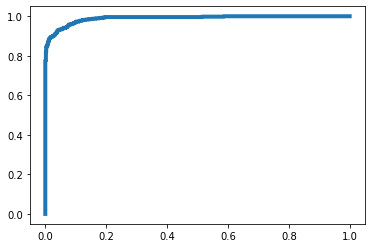

In [283]:
#Develop the roc curve
y_pred_proba = logm.predict_proba(X_val)[:,1:2]
roccurve= roc_curve(y_val,y_pred_proba)
plt.plot(roccurve[0], roccurve[1], linewidth=4)

In [286]:
#Pick a threshold value

#Maximize true positives vs false negative (y axis should be high) - Default, Think Covid tests
print(roccurve[2][((roccurve[0]<=0.075) & (roccurve[0]>=0.0)) & (roccurve[1]>=0.95)]) #Will need to iterate this a few times
threshold = roccurve[2][((roccurve[0]<=0.075) & (roccurve[0]>=0.0)) & (roccurve[1]>=0.95)][0]
threshold

#Minimize false positives vs true negative (x axis should be min)
#print(roccurve[2][((roccurve[1]>=0.95) & (roccurve[1]<=1.0)) & (roccurve[0]<=0.05)])
#threshold = roccurve[2][((roccurve[1]>=0.9) & (roccurve[1]<=1.0)) & (roccurve[0]<=0.06)][0]
#threshold

[0.21063474]


0.21063474409478722

In [287]:
#Merge training and validation, and retrain the model
X_train_val=pd.concat([X_train, X_val])
y_train_val=pd.concat([y_train, y_val])

logm = LogisticRegression().fit(X_train_val, y_train_val)

#Check value of coefficients
logm.coef_

array([[17.30361131,  0.36698641, -0.43358345, -0.64142729, -1.5010776 ,
        -2.05250237, -3.25447478, -2.74952941, -1.41899739, -0.39976725,
         0.18935393, -0.20048388,  0.15322242]])

## Step 5 - Test on the testing dataset

In [288]:
#Calculate predicted probabilities - calculate probability that y = 1 based on value in X_test
y_pred_proba = logm.predict_proba(X_test)[:,1:2]
y_pred = np.where(y_pred_proba > threshold, 1, 0)

In [289]:
#Calculate score
print(logm.score(X_test,y_test))

#Compute the confusion matrix
print(confusion_matrix(y_test,y_pred))

#Compute the accuracy score
print(accuracy_score(y_test,y_pred))

#Compute AUC score
print(roc_auc_score(y_test, y_pred_proba))

0.96
[[923 110]
 [  8 459]]
0.9213333333333333
0.9914761479319502


# Supervised Learning - Decision Tree Classifier

Note: Classify diamonds into high price or low price

## Step 1: Create labels and features, create training and test datasets

In [327]:
#Create labels and features
y=Sarah_raw_data["Price_High"]
X=Sarah_raw_data.drop(columns=["Price", "Price_High"])

In [328]:
#Create a 50:25:25 train test validation split
X_train, X_other, y_train, y_other= train_test_split(X, y, test_size=1/2)
X_val, X_test, y_val, y_test= train_test_split(X_other, y_other, test_size=1/2)

In [329]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3000, 8)
(1500, 8)
(1500, 8)


## Step 2: Data Pre-processing

Repeat steps from above

In [330]:
#Perform pre-processing on training dataset

#Drop column ID as it appears to be inconsequential to Price
X_train = X_train.drop(columns=['ID'])

#Check null values
X_train.isna().sum()

#Drop column Polish
X_train = X_train.drop(columns=['Polish'])

#Impute values for Carat Weight based on mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
X_train[['Carat Weight']]=imp.fit_transform(X_train[['Carat Weight']])

X_train.isna().sum()

#Normalize data in the Carat Weight column (in the range 0 to 1)
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_train[['Carat Weight']] = min_max_scaler.fit_transform(X_train[['Carat Weight']])

#Convert column "Cut" to take ordinal values in order - 'Fair', 'Good', 'Very Good', 'Ideal', 'Signature-Ideal'
for i in X_train.index:
    if X_train.loc[i,"Cut"]=="Fair":
        X_train.loc[i,"Cut_num"]=0
    elif X_train.loc[i,"Cut"]=="Good":
         X_train.loc[i,"Cut_num"]=1
    elif X_train.loc[i,"Cut"]=="Very Good":
         X_train.loc[i,"Cut_num"]=2
    elif X_train.loc[i,"Cut"]=="Ideal":
         X_train.loc[i,"Cut_num"]=3    
    else:
        X_train.loc[i,"Cut_num"]=4
X_train = X_train.drop(columns=['Cut'])

#Convert column "Clarity" - 'SI1' (Slightly Included) 'VS1' 'VS2' 'VVS2' 'VVS1' (Very Slightly Included) 'IF' 'FL'(Flawless)
for i in X_train.index:
    if X_train.loc[i,"Clarity"]=="SI1":
        X_train.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_train.loc[i,"Clarity"]=="IF" or X_train.loc[i,"Clarity"]=="FL":
         X_train.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_train.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_train = X_train.drop(columns=['Clarity'])

#Get dummies for categorical data
X_train=pd.get_dummies(X_train,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

###Other possible required transformations
##Taking log
#from numpy import log
#X_train["Carat Weight"]=X_train["Carat Weight"].apply(log)
##Taking square
#X_train["Carat Weight"]=X_train["Carat Weight"]**2

###Polynomial features - Multiplies each feature with the other
#from sklearn.preprocessing import PolynomialFeatures
#degree=2
#poly = PolynomialFeatures(degree)
#X_train_poly=poly.fit_transform(X_train)

In [331]:
#Repeat the same steps for the test dataset
X_val = X_val.drop(columns=['ID'])
X_val = X_val.drop(columns=['Polish'])
X_val[['Carat Weight']]=imp.fit_transform(X_val[['Carat Weight']])
X_val[['Carat Weight']] = min_max_scaler.fit_transform(X_val[['Carat Weight']])
for i in X_val.index:
    if X_val.loc[i,"Cut"]=="Fair":
        X_val.loc[i,"Cut_num"]=0
    elif X_val.loc[i,"Cut"]=="Good":
         X_val.loc[i,"Cut_num"]=1
    elif X_val.loc[i,"Cut"]=="Very Good":
         X_val.loc[i,"Cut_num"]=2
    elif X_val.loc[i,"Cut"]=="Ideal":
         X_val.loc[i,"Cut_num"]=3    
    else:
        X_val.loc[i,"Cut_num"]=4
X_val = X_val.drop(columns=['Cut'])

for i in X_val.index:
    if X_val.loc[i,"Clarity"]=="SI1":
        X_val.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_val.loc[i,"Clarity"]=="IF" or X_val.loc[i,"Clarity"]=="FL":
         X_val.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_val.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_val = X_val.drop(columns=['Clarity'])

X_val=pd.get_dummies(X_val,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

In [332]:
#Repeat the same steps for the test dataset
X_test = X_test.drop(columns=['ID'])
X_test = X_test.drop(columns=['Polish'])
X_test[['Carat Weight']]=imp.fit_transform(X_test[['Carat Weight']])
X_test[['Carat Weight']] = min_max_scaler.fit_transform(X_test[['Carat Weight']])
for i in X_test.index:
    if X_test.loc[i,"Cut"]=="Fair":
        X_test.loc[i,"Cut_num"]=0
    elif X_test.loc[i,"Cut"]=="Good":
         X_test.loc[i,"Cut_num"]=1
    elif X_test.loc[i,"Cut"]=="Very Good":
         X_test.loc[i,"Cut_num"]=2
    elif X_test.loc[i,"Cut"]=="Ideal":
         X_test.loc[i,"Cut_num"]=3    
    else:
        X_test.loc[i,"Cut_num"]=4
X_test = X_test.drop(columns=['Cut'])

for i in X_test.index:
    if X_test.loc[i,"Clarity"]=="SI1":
        X_test.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_test.loc[i,"Clarity"]=="IF" or X_test.loc[i,"Clarity"]=="FL":
         X_test.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_test.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_test = X_test.drop(columns=['Clarity'])

X_test=pd.get_dummies(X_test,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

In [333]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3000, 13)
(1500, 13)
(1500, 13)


## Step 3 - Train the model on the training set

In [334]:
#Fit the model
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 6)

#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#classifier_DT = RandomForestClassifier(max_leaf_nodes = 6)
#classifier_DT = GradientBoostingClassifier(max_leaf_nodes = 6)

classifier_DT.fit(X_train, y_train)


#Check feature importance
classifier_DT.feature_importances_

array([0.94874066, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03535107, 0.01590827, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Step 3a - Visualize the tree

[Text(279.0, 391.392, 'Carat Weight <= 0.354\ngini = 0.43\nsamples = 3000\nvalue = [2062, 938]\nclass = Price_Low'),
 Text(139.5, 304.416, 'Carat Weight <= 0.266\ngini = 0.13\nsamples = 2127\nvalue = [1978, 149]\nclass = Price_Low'),
 Text(69.75, 217.44, 'gini = 0.049\nsamples = 1853\nvalue = [1806, 47]\nclass = Price_Low'),
 Text(209.25, 217.44, 'gini = 0.467\nsamples = 274\nvalue = [172, 102]\nclass = Price_Low'),
 Text(418.5, 304.416, 'Carat Weight <= 0.447\ngini = 0.174\nsamples = 873\nvalue = [84, 789]\nclass = Price_High'),
 Text(348.75, 217.44, 'Color_I <= 0.5\ngini = 0.475\nsamples = 214\nvalue = [83, 131]\nclass = Price_High'),
 Text(279.0, 130.464, 'Clarity_upd_Slightly_Incl <= 0.5\ngini = 0.338\nsamples = 158\nvalue = [34, 124]\nclass = Price_High'),
 Text(209.25, 43.488, 'gini = 0.107\nsamples = 106\nvalue = [6, 100]\nclass = Price_High'),
 Text(348.75, 43.488, 'gini = 0.497\nsamples = 52\nvalue = [28, 24]\nclass = Price_Low'),
 Text(418.5, 130.464, 'gini = 0.219\nsamples =

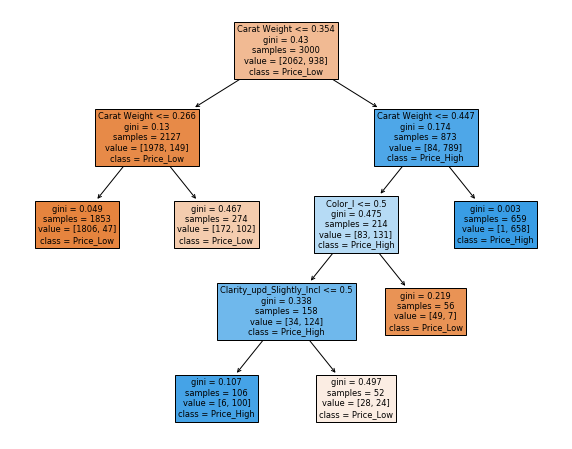

In [335]:
#Only works precisely with Decision Tree Classifier and Decision Tree Regressor
from matplotlib.pyplot import figure
from sklearn import tree
figure(figsize=(10,8)) #makes plot large
tree.plot_tree(classifier_DT,  class_names=("Price_Low","Price_High"), feature_names=X_train.columns, filled=True)

## Step 4 - Validate the hyperparameters, set a threshold, retrain on training + validation

In [336]:
#Tune hyperparameters - Set value for max_leaf_nodes
n_max_leaf_nodes = range(2,60) # Lets train the models with 2, 3, 4, ... 60 leafs
array_train = []
array_val= []

for n in n_max_leaf_nodes:
    classifier_DT = DecisionTreeClassifier(max_leaf_nodes = n).fit(X_train, y_train) #modify here if you change model
    #classifier_DT = RandomForestClassifier(max_leaf_nodes = n).fit(X_train, y_train) #modify here if you change model
    #classifier_DT = GradientBoostingClassifier(max_leaf_nodes = n).fit(X_train, y_train) #modify here if you change model

    y_pred_train = classifier_DT.predict_proba(X_train)[:,1]
    y_pred_val = classifier_DT.predict_proba(X_val)[:,1]
    
    #NOTE: AUC score is used to test model quality
    score_train=roc_auc_score(y_train,y_pred_train)
    score_val=roc_auc_score(y_val,y_pred_val)
    array_train.append(score_train)
    array_val.append(score_val)

Text(0, 0.5, 'AUC')

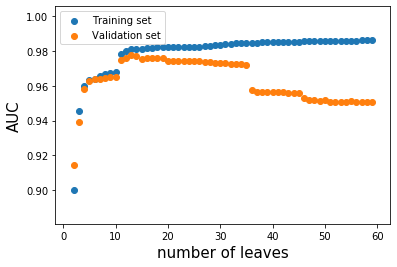

In [337]:
#Develop a plot to pick the hyperparameter value
plt.scatter(n_max_leaf_nodes,array_train)
plt.scatter(n_max_leaf_nodes,array_val)
plt.legend(['Training set','Validation set'])
plt. xlabel("number of leaves",fontsize=15)
plt. ylabel("AUC",fontsize=15)

I pick max_leaf_nodes = 15

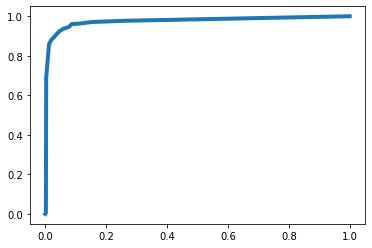

In [338]:
#Develop the roc curve
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 15)
#classifier_DT = RandomForestClassifier(max_leaf_nodes = 15)
#classifier_DT = GradientBoostingClassifier(max_leaf_nodes = 15)
classifier_DT.fit(X_train, y_train)

y_pred_proba = classifier_DT.predict_proba(X_val)[:,1:2]
roccurve= roc_curve(y_val,y_pred_proba)
plt.plot(roccurve[0], roccurve[1], linewidth=4)

In [341]:
#Pick a threshold value

#Maximize true positives vs false negative (y axis should be high) - Default, Think Covid tests
print(roccurve[2][((roccurve[0]<=0.1) & (roccurve[0]>=0.0)) & (roccurve[1]>=0.95)]) #Will need to iterate this a few times
threshold = roccurve[2][((roccurve[0]<=0.1) & (roccurve[0]>=0.0)) & (roccurve[1]>=0.95)][0]
threshold

#Minimize false positives vs true negative (x axis should be min)
#print(roccurve[2][((roccurve[1]>=0.89) & (roccurve[1]<=1.0)) & (roccurve[0]<=0.06)])
#threshold = roccurve[2][((roccurve[1]>=0.89) & (roccurve[1]<=1.0)) & (roccurve[0]<=0.06)][0]
#threshold

[0.26923077 0.25      ]


0.2692307692307692

In [342]:
#Merge training and validation, and retrain the model
X_train_val=pd.concat([X_train, X_val])
y_train_val=pd.concat([y_train, y_val])

classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 15)
#classifier_DT = RandomForestClassifier(max_leaf_nodes = 15)
#classifier_DT = GradientBoostingClassifier(max_leaf_nodes = 15)

classifier_DT.fit(X_train_val, y_train_val)

#Check feature importance
classifier_DT.feature_importances_

array([0.90865603, 0.        , 0.00396957, 0.00271038, 0.        ,
       0.00989825, 0.04868941, 0.02607636, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

[Text(344.6470588235294, 403.81714285714287, 'Carat Weight <= 0.354\ngini = 0.432\nsamples = 4500\nvalue = [3080, 1420]\nclass = Price_Low'),
 Text(196.94117647058823, 341.69142857142856, 'Carat Weight <= 0.266\ngini = 0.121\nsamples = 3142\nvalue = [2938, 204]\nclass = Price_Low'),
 Text(65.6470588235294, 279.5657142857143, 'Carat Weight <= 0.173\ngini = 0.051\nsamples = 2774\nvalue = [2701, 73]\nclass = Price_Low'),
 Text(32.8235294117647, 217.44, 'gini = 0.015\nsamples = 2122\nvalue = [2106, 16]\nclass = Price_Low'),
 Text(98.47058823529412, 217.44, 'Color_E <= 0.5\ngini = 0.16\nsamples = 652\nvalue = [595, 57]\nclass = Price_Low'),
 Text(65.6470588235294, 155.3142857142857, 'Color_F <= 0.5\ngini = 0.119\nsamples = 584\nvalue = [547, 37]\nclass = Price_Low'),
 Text(32.8235294117647, 93.18857142857144, 'gini = 0.068\nsamples = 483\nvalue = [466, 17]\nclass = Price_Low'),
 Text(98.47058823529412, 93.18857142857144, 'Carat Weight <= 0.221\ngini = 0.318\nsamples = 101\nvalue = [81, 20]\

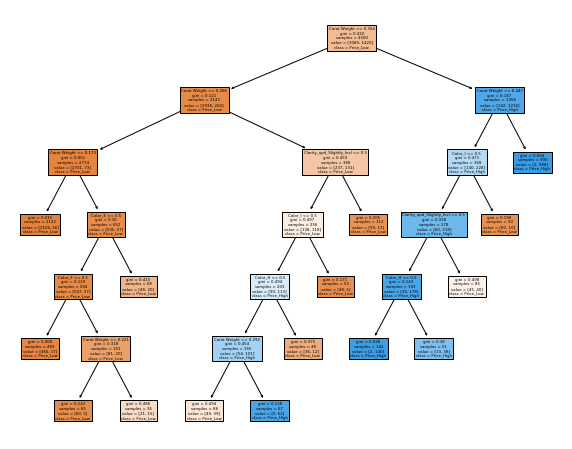

In [343]:
#Revisualize the tree, Only works precisely with Decision Tree Classifier and Decision Tree Regressor
figure(figsize=(10,8)) #makes plot large
tree.plot_tree(classifier_DT,  class_names=("Price_Low","Price_High"), feature_names=X_train_val.columns, filled=True)

## Step 5 - Test on the testing dataset

In [344]:
#Calculate predicted probabilities - calculate probability that y = 1 based on value in X_test
y_pred_proba = classifier_DT.predict_proba(X_test)[:,1:2]
y_pred = np.where(y_pred_proba > threshold, 1, 0)

In [345]:
#Calculate score
print(classifier_DT.score(X_test,y_test))

#Compute the confusion matrix
print(confusion_matrix(y_test,y_pred))

#Compute the accuracy score
print(accuracy_score(y_test,y_pred))

#Compute AUC score
print(roc_auc_score(y_test, y_pred_proba))

0.9406666666666667
[[929  90]
 [ 26 455]]
0.9226666666666666
0.9736401306568137


# Supervised Learning - Decision Tree Regressor

## Step 1: Create labels and features, create training and test datasets

In [346]:
#Create labels and features
y=Sarah_raw_data[["Price"]]
X=Sarah_raw_data.drop(columns=["Price", "Price_High"])

In [347]:
#Create a 50:25:25 train test validation split
X_train, X_other, y_train, y_other= train_test_split(X, y, test_size=1/2)
X_val, X_test, y_val, y_test= train_test_split(X_other, y_other, test_size=1/2)

## Step 2: Data Pre-processing

Repeat steps from above

In [348]:
#Perform pre-processing on training dataset

#Drop column ID as it appears to be inconsequential to Price
X_train = X_train.drop(columns=['ID'])

#Check null values
X_train.isna().sum()

#Drop column Polish
X_train = X_train.drop(columns=['Polish'])

#Impute values for Carat Weight based on mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
X_train[['Carat Weight']]=imp.fit_transform(X_train[['Carat Weight']])

X_train.isna().sum()

#Normalize data in the Carat Weight column (in the range 0 to 1)
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_train[['Carat Weight']] = min_max_scaler.fit_transform(X_train[['Carat Weight']])

#Convert column "Cut" to take ordinal values in order - 'Fair', 'Good', 'Very Good', 'Ideal', 'Signature-Ideal'
for i in X_train.index:
    if X_train.loc[i,"Cut"]=="Fair":
        X_train.loc[i,"Cut_num"]=0
    elif X_train.loc[i,"Cut"]=="Good":
         X_train.loc[i,"Cut_num"]=1
    elif X_train.loc[i,"Cut"]=="Very Good":
         X_train.loc[i,"Cut_num"]=2
    elif X_train.loc[i,"Cut"]=="Ideal":
         X_train.loc[i,"Cut_num"]=3    
    else:
        X_train.loc[i,"Cut_num"]=4
X_train = X_train.drop(columns=['Cut'])

#Convert column "Clarity" - 'SI1' (Slightly Included) 'VS1' 'VS2' 'VVS2' 'VVS1' (Very Slightly Included) 'IF' 'FL'(Flawless)
for i in X_train.index:
    if X_train.loc[i,"Clarity"]=="SI1":
        X_train.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_train.loc[i,"Clarity"]=="IF" or X_train.loc[i,"Clarity"]=="FL":
         X_train.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_train.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_train = X_train.drop(columns=['Clarity'])

#Get dummies for categorical data
X_train=pd.get_dummies(X_train,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

###Other possible required transformations
##Taking log
#from numpy import log
#X_train["Carat Weight"]=X_train["Carat Weight"].apply(log)
##Taking square
#X_train["Carat Weight"]=X_train["Carat Weight"]**2

###Polynomial features - Multiplies each feature with the other
#from sklearn.preprocessing import PolynomialFeatures
#degree=2
#poly = PolynomialFeatures(degree)
#X_train_poly=poly.fit_transform(X_train)

In [349]:
#Repeat the same steps for the test dataset
X_val = X_val.drop(columns=['ID'])
X_val = X_val.drop(columns=['Polish'])
X_val[['Carat Weight']]=imp.fit_transform(X_val[['Carat Weight']])
X_val[['Carat Weight']] = min_max_scaler.fit_transform(X_val[['Carat Weight']])
for i in X_val.index:
    if X_val.loc[i,"Cut"]=="Fair":
        X_val.loc[i,"Cut_num"]=0
    elif X_val.loc[i,"Cut"]=="Good":
         X_val.loc[i,"Cut_num"]=1
    elif X_val.loc[i,"Cut"]=="Very Good":
         X_val.loc[i,"Cut_num"]=2
    elif X_val.loc[i,"Cut"]=="Ideal":
         X_val.loc[i,"Cut_num"]=3    
    else:
        X_val.loc[i,"Cut_num"]=4
X_val = X_val.drop(columns=['Cut'])

for i in X_val.index:
    if X_val.loc[i,"Clarity"]=="SI1":
        X_val.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_val.loc[i,"Clarity"]=="IF" or X_val.loc[i,"Clarity"]=="FL":
         X_val.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_val.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_val = X_val.drop(columns=['Clarity'])

X_val=pd.get_dummies(X_val,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

In [350]:
#Repeat the same steps for the test dataset
X_test = X_test.drop(columns=['ID'])
X_test = X_test.drop(columns=['Polish'])
X_test[['Carat Weight']]=imp.fit_transform(X_test[['Carat Weight']])
X_test[['Carat Weight']] = min_max_scaler.fit_transform(X_test[['Carat Weight']])
for i in X_test.index:
    if X_test.loc[i,"Cut"]=="Fair":
        X_test.loc[i,"Cut_num"]=0
    elif X_test.loc[i,"Cut"]=="Good":
         X_test.loc[i,"Cut_num"]=1
    elif X_test.loc[i,"Cut"]=="Very Good":
         X_test.loc[i,"Cut_num"]=2
    elif X_test.loc[i,"Cut"]=="Ideal":
         X_test.loc[i,"Cut_num"]=3    
    else:
        X_test.loc[i,"Cut_num"]=4
X_test = X_test.drop(columns=['Cut'])

for i in X_test.index:
    if X_test.loc[i,"Clarity"]=="SI1":
        X_test.loc[i,"Clarity_upd"]="Slightly_Incl"
    elif X_test.loc[i,"Clarity"]=="IF" or X_test.loc[i,"Clarity"]=="FL":
         X_test.loc[i,"Clarity_upd"]="Flawless"
    else:
        X_test.loc[i,"Clarity_upd"]="Very_Slightly_Incl"
X_test = X_test.drop(columns=['Clarity'])

X_test=pd.get_dummies(X_test,columns=['Color', 'Clarity_upd', 'Symmetry','Report'], drop_first=True)

## Step 3 - Train the model on the training set

In [351]:
#Fit the model
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_leaf_nodes=6)

#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#regressor_DT = RandomForestRegressor(max_leaf_nodes=6)
#regressor_DT = GradientBoostingRegressor(max_leaf_nodes=6)

regressor_DT.fit(X_train, y_train)

#Check feature importance
regressor_DT.feature_importances_

array([0.88555526, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0538406 , 0.06060414, 0.        ,
       0.        , 0.        , 0.        ])

## Step 3a - Visualize the tree

[Text(279.0, 391.392, 'Carat Weight <= 0.488\nmse = 112327005.608\nsamples = 3000\nvalue = 12151.58'),
 Text(139.5, 304.416, 'Carat Weight <= 0.22\nmse = 18442284.926\nsamples = 2324\nvalue = 7644.948'),
 Text(69.75, 217.44, 'mse = 5236991.067\nsamples = 1649\nvalue = 5900.186'),
 Text(209.25, 217.44, 'mse = 25097521.968\nsamples = 675\nvalue = 11907.336'),
 Text(418.5, 304.416, 'Clarity_upd_Slightly_Incl <= 0.5\nmse = 125228545.134\nsamples = 676\nvalue = 27644.794'),
 Text(348.75, 217.44, 'Clarity_upd_Very_Slightly_Incl <= 0.5\nmse = 132926360.09\nsamples = 517\nvalue = 30187.12'),
 Text(279.0, 130.464, 'Carat Weight <= 0.838\nmse = 469505456.793\nsamples = 33\nvalue = 51486.545'),
 Text(209.25, 43.488, 'mse = 284658663.943\nsamples = 30\nvalue = 46906.3'),
 Text(348.75, 43.488, 'mse = 10322058.667\nsamples = 3\nvalue = 97289.0'),
 Text(418.5, 130.464, 'mse = 76937062.46\nsamples = 484\nvalue = 28734.886'),
 Text(488.25, 217.44, 'mse = 10846330.194\nsamples = 159\nvalue = 19378.239')

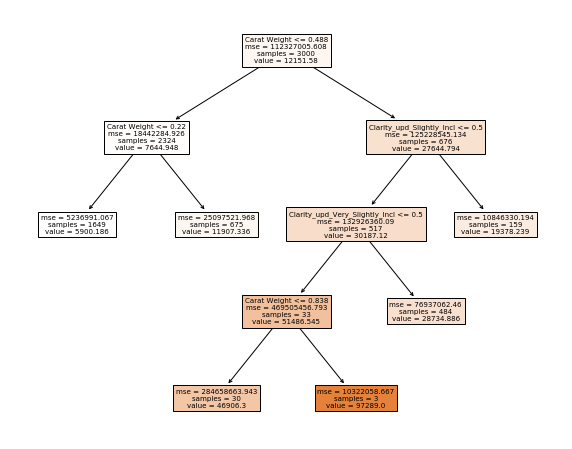

In [352]:
#Only works precisely with Decision Tree Classifier and Decision Tree Regressor
from matplotlib.pyplot import figure
from sklearn import tree
figure(figsize=(10,8)) #makes plot large
tree.plot_tree(regressor_DT, feature_names=X_train.columns, filled=True)

## Step 4 - Validate the hyperparameters, set a threshold, retrain on training + validation

In [353]:
#Tune hyperparameters - Set value for max_leaf_nodes
n_max_leaf_nodes = range(2,40) # Lets train the models with 2, 3, 4, ... 60 leafs
array_train = []
array_val= []

for n in n_max_leaf_nodes:  
    regressor_DT = DecisionTreeRegressor(max_leaf_nodes=n).fit(X_train, y_train) #modify here if you change model
    #regressor_DT = RandomForestRegressor(max_leaf_nodes=n).fit(X_train, y_train)
    #regressor_DT = GradientBoostingRegressor(max_leaf_nodes=n).fit(X_train, y_train)
    y_pred_train = regressor_DT.predict(X_train)
    y_pred_val = regressor_DT.predict(X_val)
    score_train=mean_squared_error(y_train,y_pred_train)**(1/2)
    score_val=mean_squared_error(y_val,y_pred_val)**(1/2)
    array_train.append(score_train)
    array_val.append(score_val)

Text(0, 0.5, 'MSE')

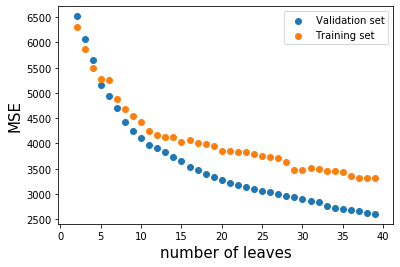

In [354]:
#Develop a plot to pick the hyperparameter value
plt.scatter(n_max_leaf_nodes,array_train)
plt.scatter(n_max_leaf_nodes,array_val)
plt.legend(['Validation set','Training set'])
plt. xlabel("number of leaves",fontsize=15)
plt. ylabel("MSE",fontsize=15)

I pick max_leaf_nodes = 8

In [355]:
#Merge training and validation, and retrain the model
X_train_val=pd.concat([X_train, X_val])
y_train_val=pd.concat([y_train, y_val])

regressor_DT = DecisionTreeRegressor(max_leaf_nodes=8)
#regressor_DT = RandomForestRegressor(max_leaf_nodes=8)
#regressor_DT = GradientBoostingRegressor(max_leaf_nodes=8)
regressor_DT.fit(X_train_val, y_train_val)

#Check feature importance
regressor_DT.feature_importances_

array([0.83993713, 0.        , 0.        , 0.        , 0.        ,
       0.02712591, 0.03116566, 0.05219076, 0.04958054, 0.        ,
       0.        , 0.        , 0.        ])

[Text(279.0, 403.81714285714287, 'Carat Weight <= 0.498\nmse = 107835405.937\nsamples = 4500\nvalue = 11951.776'),
 Text(139.5, 341.69142857142856, 'Carat Weight <= 0.226\nmse = 18885873.232\nsamples = 3513\nvalue = 7636.882'),
 Text(69.75, 279.5657142857143, 'mse = 5245349.122\nsamples = 2525\nvalue = 5935.372'),
 Text(209.25, 279.5657142857143, 'mse = 27438094.015\nsamples = 988\nvalue = 11985.379'),
 Text(418.5, 341.69142857142856, 'Clarity_upd_Slightly_Incl <= 0.5\nmse = 122298958.102\nsamples = 987\nvalue = 27309.65'),
 Text(348.75, 279.5657142857143, 'Clarity_upd_Very_Slightly_Incl <= 0.5\nmse = 132683747.626\nsamples = 733\nvalue = 29999.33'),
 Text(279.0, 217.44, 'mse = 422626256.492\nsamples = 44\nvalue = 50448.909'),
 Text(418.5, 217.44, 'Color_I <= 0.5\nmse = 85756797.455\nsamples = 689\nvalue = 28693.406'),
 Text(348.75, 155.3142857142857, 'Color_H <= 0.5\nmse = 79016402.869\nsamples = 578\nvalue = 30545.332'),
 Text(279.0, 93.18857142857144, 'Carat Weight <= 0.714\nmse = 7

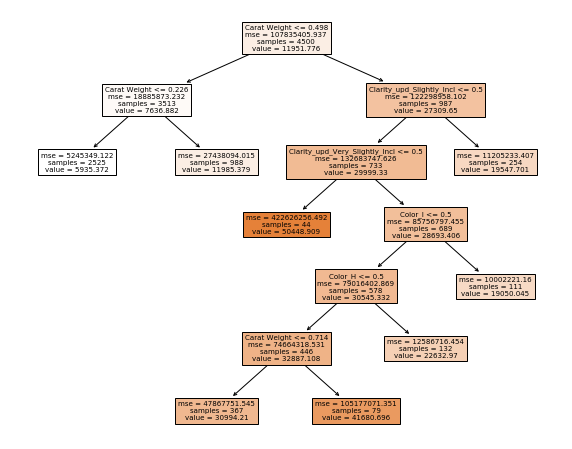

In [356]:
#Revisualize the tree, Only works precisely with Decision Tree Classifier and Decision Tree Regressor
figure(figsize=(10,8)) #makes plot large
tree.plot_tree(regressor_DT, feature_names=X_train_val.columns, filled=True)

## Step 5 - Test on the testing dataset

In [357]:
#Calculate predicted values
y_pred = regressor_DT.predict(X_test)

In [358]:
#Calculate r-square, root mean squraed error
print(regressor_DT.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred)**(1/2))

0.785334133677363
4419.810787158276
